# 3조 : 1주차 제조데이터 실습 모델링 코드

In [1]:
cleaned_file_path = '../data/1주_실습데이터_cleaned.csv'

### 데이터 로드

In [2]:
import pandas as pd

data = pd.read_csv(cleaned_file_path)

In [3]:
X = data.drop(columns=['Y'])
y = data['Y'].values

In [4]:
X.shape

(526955, 16)

In [5]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,0.202296,0.003560,0.411261,0.015348,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,0.003053,0.682731,0.249262,0.681974,0.016330,0.242926
1,0.006836,0.007688,0.597304,0.015348,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,0.005816,0.680891,0.249262,0.497403,0.670040,0.245876
2,0.609621,0.001461,0.466186,0.015348,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,0.001475,0.685525,0.249262,0.647685,0.648486,0.243602
3,0.074007,0.003072,0.535876,0.015348,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,0.002462,0.677980,0.249262,0.575364,0.632563,0.246078
4,0.198356,0.007020,0.416238,0.015348,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,0.005314,0.673286,0.249262,0.537143,0.671124,0.245505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526950,0.612937,0.001173,0.401400,0.015348,0.693147,0.015237,0.346218,0.020338,0.470004,0.298167,0.001164,0.679403,0.249262,0.483797,0.664080,0.243377
526951,0.512265,0.002282,0.395505,0.015348,0.688810,0.021745,0.342540,0.024307,0.681974,0.297209,0.002300,0.687581,0.249262,0.670674,0.658006,0.240500
526952,0.390334,0.008615,0.415327,0.015348,0.693147,0.068450,0.451511,0.028167,0.470004,0.599760,0.007902,0.680428,0.249262,0.456017,0.682601,0.693147
526953,0.512265,0.002267,0.394744,0.015348,0.688810,0.020826,0.341926,0.024307,0.693147,0.296889,0.002346,0.689263,0.249262,0.681974,0.658006,0.240500


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [7]:
# 데이터 스케일링 (사용 X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.8639478 , -0.09324163, -0.42243255, ...,  1.22159293,
        -3.55070743, -0.13458328],
       [-1.84101953,  0.86301666,  1.34686597, ..., -1.58570671,
         0.39986665, -0.03739791],
       [ 1.1721973 , -0.57963926,  0.09991082, ...,  0.70006126,
         0.26960951, -0.1123037 ],
       ...,
       [ 0.07602039,  1.07794694, -0.38376207, ..., -2.21516892,
         0.47578104, 14.69939263],
       [ 0.6855337 , -0.39295633, -0.57951029, ...,  1.22159293,
         0.32714253, -0.21453607],
       [-1.2815543 , -0.16989633, -0.5450026 , ...,  0.52216699,
         0.14273904, -0.18104092]])

In [8]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).reset_index(drop=True)
X_scaled

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,-0.863948,-0.093242,-0.422433,-2.081668e-17,0.392602,-0.064114,-0.167922,0.768462,1.109069,-0.126008,-0.073411,0.514264,-1.387779e-16,1.221593,-3.550707,-0.134583
1,-1.841020,0.863017,1.346866,-2.081668e-17,0.347325,1.762800,-0.017488,0.913081,-1.480815,-0.061110,0.596291,0.157704,-1.387779e-16,-1.585707,0.399867,-0.037398
2,1.172197,-0.579639,0.099911,-2.081668e-17,0.392188,-1.088912,-0.115438,-0.170237,0.627928,-0.051798,-0.455671,1.055968,-1.387779e-16,0.700061,0.269610,-0.112304
3,-1.505241,-0.206262,0.762680,-2.081668e-17,0.392602,-0.351542,-0.030146,0.063020,-0.212556,-0.117411,-0.216649,-0.406532,-1.387779e-16,-0.399923,0.173385,-0.030732
4,-0.883645,0.708206,-0.375102,-2.081668e-17,0.347325,1.438054,-0.032254,0.863382,-0.923183,-0.054438,0.474542,-1.316453,-1.387779e-16,-0.981263,0.406422,-0.049622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526950,1.188775,-0.646349,-0.516208,-2.081668e-17,0.392602,-1.307044,-0.074482,-1.260327,-1.865275,-0.054438,-0.531087,-0.130679,-1.387779e-16,-1.792646,0.363851,-0.119721
526951,0.685534,-0.389308,-0.572278,-2.081668e-17,0.361478,-0.924083,-0.201472,-0.221351,1.109069,-0.083045,-0.255762,1.454560,-1.387779e-16,1.049728,0.327143,-0.214536
526952,0.076020,1.077947,-0.383762,-2.081668e-17,0.392602,1.824171,3.560788,0.789205,-1.865275,8.948840,1.101967,0.067910,-1.387779e-16,-2.215169,0.475781,14.699393
526953,0.685534,-0.392956,-0.579510,-2.081668e-17,0.361478,-0.978132,-0.222683,-0.221351,1.265852,-0.092587,-0.244736,1.780540,-1.387779e-16,1.221593,0.327143,-0.214536


In [9]:
# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
34185,0.654518,0.004330,0.412258,0.015348,0.693147,0.041698,0.343890,0.027929,0.670674,0.294763,0.003656,0.687511,0.249262,0.670674,0.689884,0.243276
178072,0.030328,0.003398,0.533966,0.015348,0.693147,0.035842,0.347777,0.025855,0.575364,0.295982,0.002928,0.683176,0.249262,0.562785,0.632312,0.246280
159750,0.676623,0.003292,0.423246,0.015348,0.693090,0.034267,0.346269,0.024797,0.562785,0.297013,0.002700,0.686104,0.249262,0.575364,0.643912,0.244616
50632,0.586322,0.005767,0.565887,0.015348,0.693147,0.053185,0.345973,0.028202,0.587787,0.297368,0.004557,0.674534,0.249262,0.587787,0.679156,0.244425
416822,0.640801,0.003742,0.436793,0.015348,0.693147,0.036961,0.343879,0.027882,0.670674,0.297188,0.003086,0.670879,0.249262,0.670674,0.013128,0.243186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.110735,0.005338,0.423000,0.015348,0.405465,0.050172,0.346065,0.028102,0.635989,0.295403,0.004215,0.682961,0.249262,0.624154,0.675700,0.245254
259178,0.446832,0.002793,0.416238,0.015348,0.693090,0.029082,0.345419,0.024416,0.624154,0.298007,0.002440,0.686650,0.249262,0.624154,0.647041,0.244053
365838,0.400026,0.008040,0.543773,0.015348,0.693147,0.069878,0.348205,0.028933,0.483797,0.296249,0.005923,0.680046,0.249262,0.470004,0.682671,0.246715
131932,0.676891,0.003305,0.475898,0.015348,0.693147,0.033723,0.342860,0.027964,0.693147,0.294472,0.002853,0.681844,0.249262,0.681974,0.023630,0.242193


In [11]:
# # 불균형 데이터 처리 (SMOTE 적용)
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
34185,0.654518,0.004330,0.412258,0.015348,0.693147,0.041698,0.343890,0.027929,0.670674,0.294763,0.003656,0.687511,0.249262,0.670674,0.689884,0.243276
178072,0.030328,0.003398,0.533966,0.015348,0.693147,0.035842,0.347777,0.025855,0.575364,0.295982,0.002928,0.683176,0.249262,0.562785,0.632312,0.246280
159750,0.676623,0.003292,0.423246,0.015348,0.693090,0.034267,0.346269,0.024797,0.562785,0.297013,0.002700,0.686104,0.249262,0.575364,0.643912,0.244616
50632,0.586322,0.005767,0.565887,0.015348,0.693147,0.053185,0.345973,0.028202,0.587787,0.297368,0.004557,0.674534,0.249262,0.587787,0.679156,0.244425
416822,0.640801,0.003742,0.436793,0.015348,0.693147,0.036961,0.343879,0.027882,0.670674,0.297188,0.003086,0.670879,0.249262,0.670674,0.013128,0.243186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.110735,0.005338,0.423000,0.015348,0.405465,0.050172,0.346065,0.028102,0.635989,0.295403,0.004215,0.682961,0.249262,0.624154,0.675700,0.245254
259178,0.446832,0.002793,0.416238,0.015348,0.693090,0.029082,0.345419,0.024416,0.624154,0.298007,0.002440,0.686650,0.249262,0.624154,0.647041,0.244053
365838,0.400026,0.008040,0.543773,0.015348,0.693147,0.069878,0.348205,0.028933,0.483797,0.296249,0.005923,0.680046,0.249262,0.470004,0.682671,0.246715
131932,0.676891,0.003305,0.475898,0.015348,0.693147,0.033723,0.342860,0.027964,0.693147,0.294472,0.002853,0.681844,0.249262,0.681974,0.023630,0.242193


### 베이스라인 모델 선정

#### AutoML

In [13]:
# PyCaret의 분류 모듈 import
from pycaret.classification import *

classificator = setup(
    data,
    target='Y',
    train_size=0.8,
    data_split_stratify=True,
    session_id=0
)

comp_model = compare_models()

,Description,Value
0,Session id,0
1,Target,Y
2,Target type,Binary
3,Original data shape,"(526955, 17)"
4,Transformed data shape,"(526955, 17)"
5,Transformed train set shape,"(421564, 17)"
6,Transformed test set shape,"(105391, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9997,0.9998,0.9972,0.9999,0.9985,0.9984,0.9984,28.4250
et,Extra Trees Classifier,0.9997,0.9998,0.9974,1.0000,0.9987,0.9985,0.9985,6.1300
xgboost,Extreme Gradient Boosting,0.9997,0.9998,0.9975,0.9998,0.9987,0.9985,0.9985,12.6080
knn,K Neighbors Classifier,0.9994,0.9986,0.9950,0.9998,0.9974,0.9971,0.9971,38.9040
dt,Decision Tree Classifier,0.9994,0.9983,0.9969,0.9975,0.9972,0.9969,0.9969,2.1280
gbc,Gradient Boosting Classifier,0.9992,0.9992,0.9933,0.9995,0.9964,0.9959,0.9959,22.3240
lightgbm,Light Gradient Boosting Machine,0.9991,0.9991,0.9963,0.9955,0.9959,0.9954,0.9954,0.9170
ada,Ada Boost Classifier,0.9988,0.9994,0.9899,0.9989,0.9944,0.9937,0.9937,4.6420
lr,Logistic Regression,0.9889,0.9977,0.8986,0.9981,0.9458,0.9396,0.9412,1.0950
svm,SVM - Linear Kernel,0.9337,0.0000,0.3868,1.0000,0.5578,0.5294,0.6000,0.1540


### XGB 모델 성능 평가

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# XGBoost 분류기
xgb = XGBClassifier(learning_rate=0.01, objective='binary:logistic', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

[[93784     4]
 [  109 11494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93788
           1       1.00      0.99      1.00     11603

    accuracy                           1.00    105391
   macro avg       1.00      1.00      1.00    105391
weighted avg       1.00      1.00      1.00    105391



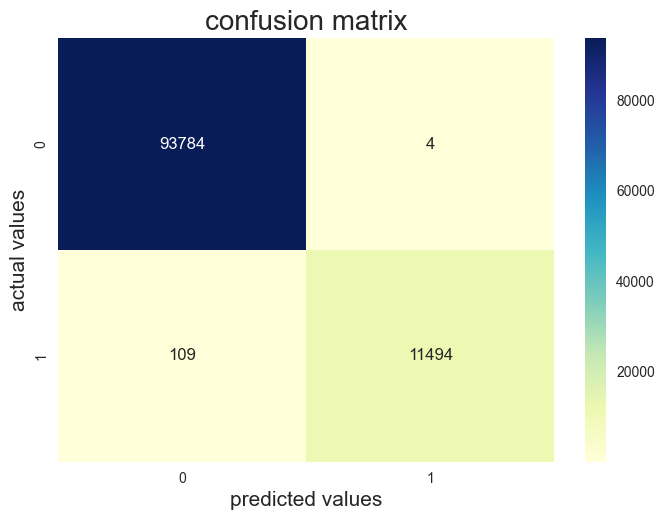

TN, FP, FN, TP: 93784 4 109 11494
accuracy 0.9989278021842473
precision 0.999652113411028
recall 0.9906058777902267
F1 score 0.9951084368642051


In [16]:
# 예측 및 평가
y_test_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", cmap='YlGnBu')
plt.xlabel('predicted values', size=15)
plt.ylabel('actual values', size=15)
plt.title('confusion matrix', size=20)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

print('accuracy', accuracy_score(y_test, y_test_pred))
print('precision', precision_score(y_test, y_test_pred))
print('recall', recall_score(y_test, y_test_pred))
print('F1 score', f1_score(y_test, y_test_pred))

### 변수가 모델에 미치는 영향 파악

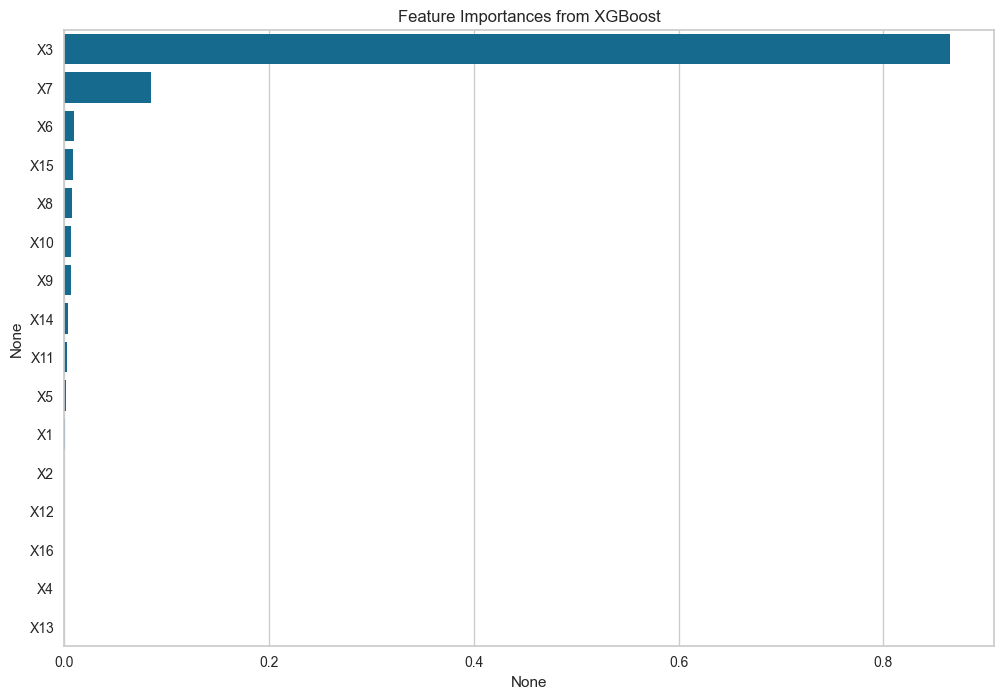

In [17]:
# Feature importance
feature_importances = pd.Series(xgb.feature_importances_, index=data.drop(columns=['Y']).columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from XGBoost')
plt.show()

#### SHAP

In [18]:
import shap

explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)

 99%|===================| 104620/105391 [01:31<00:00]        

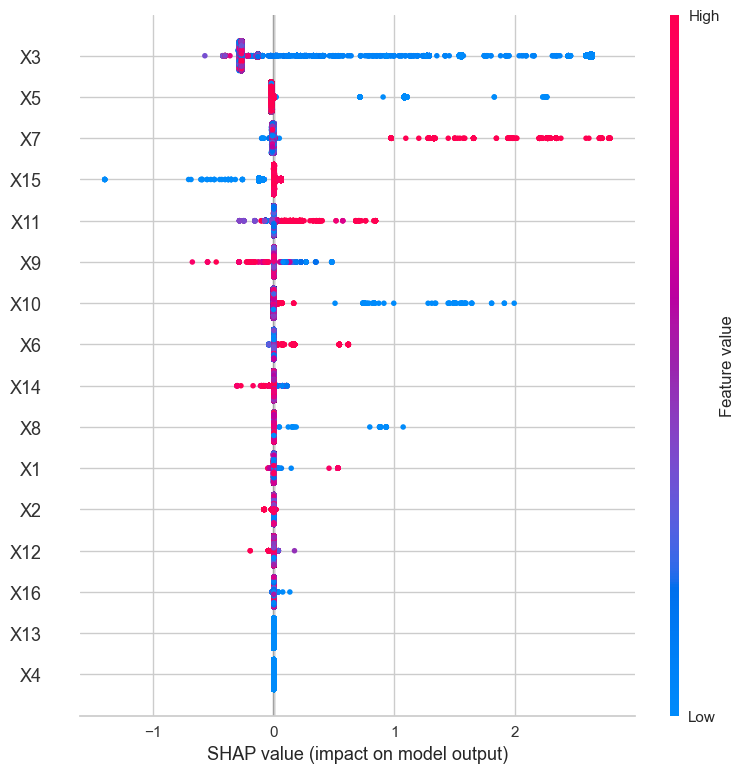

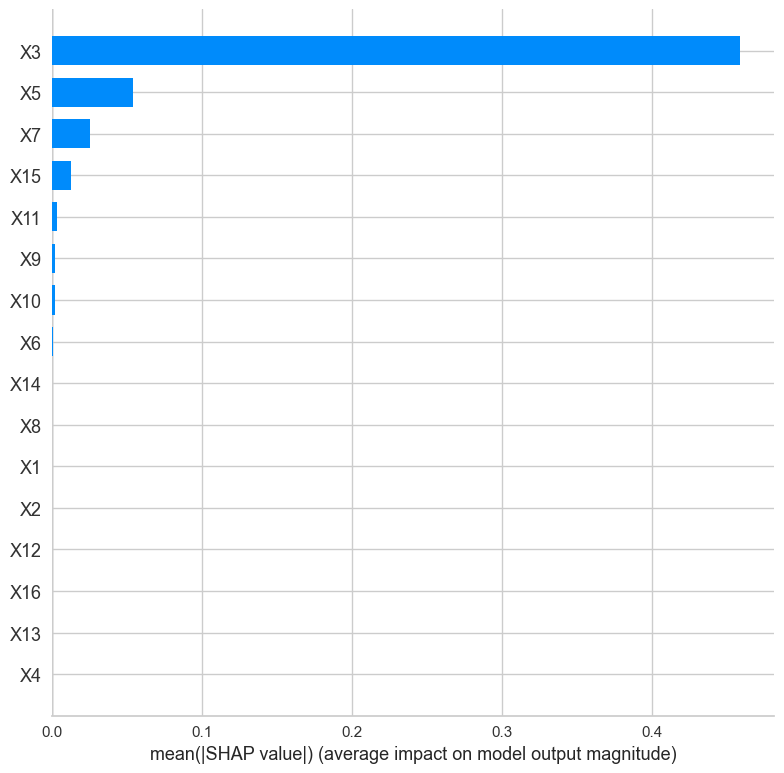

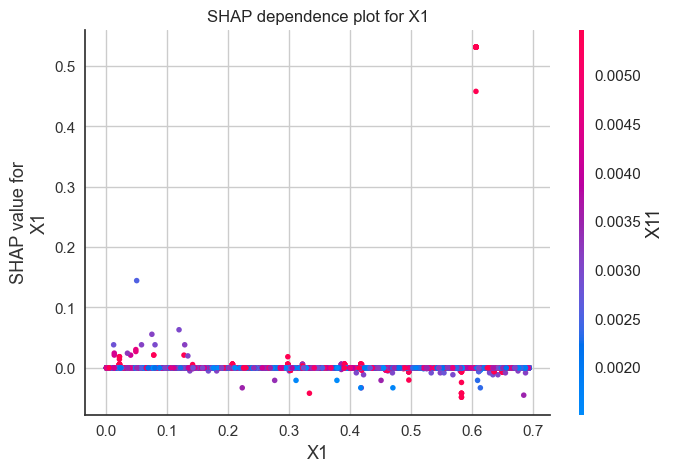

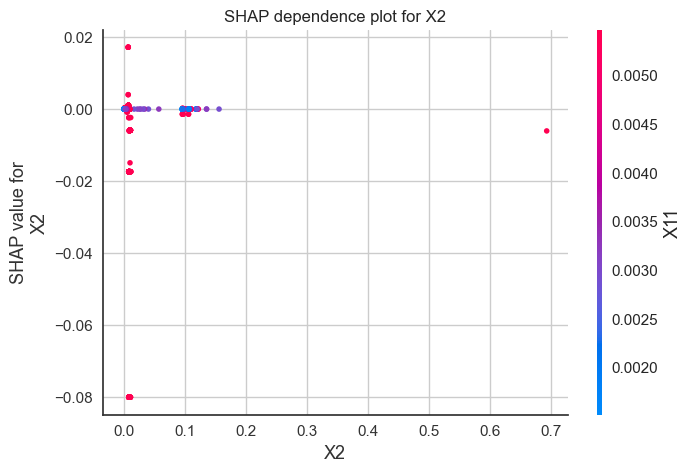

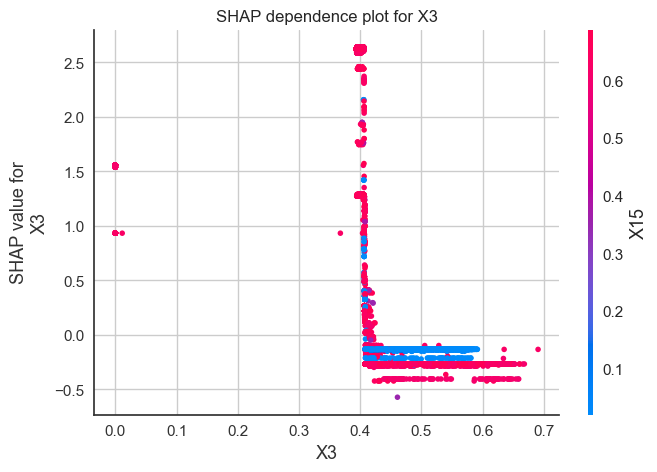

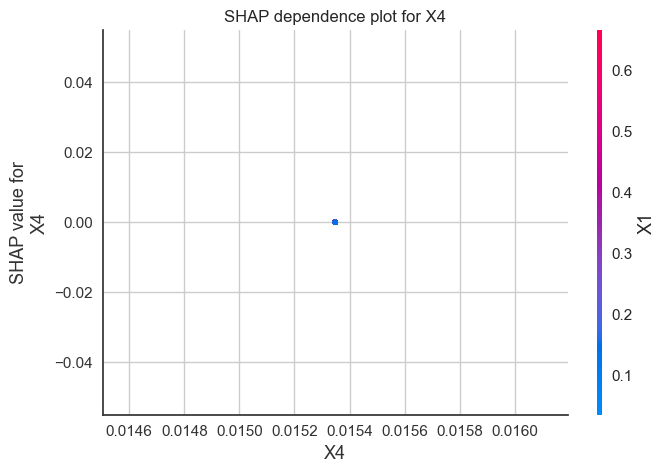

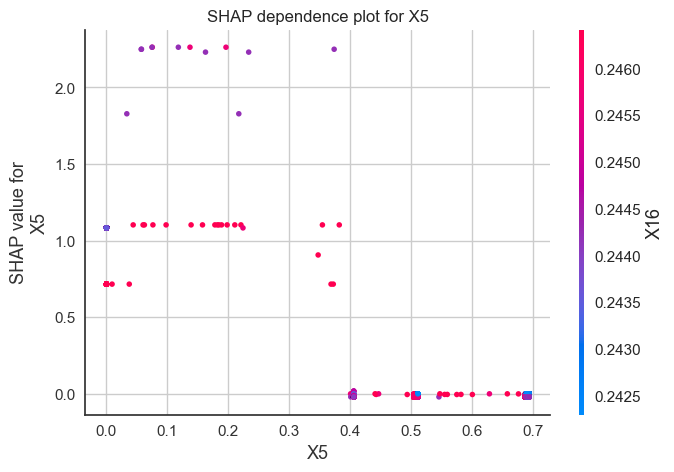

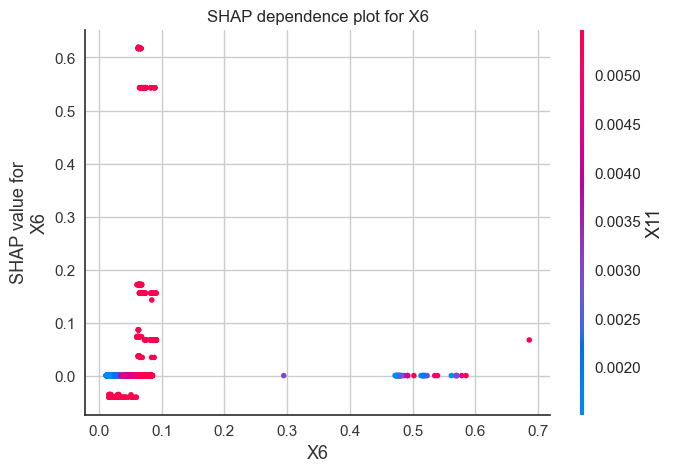

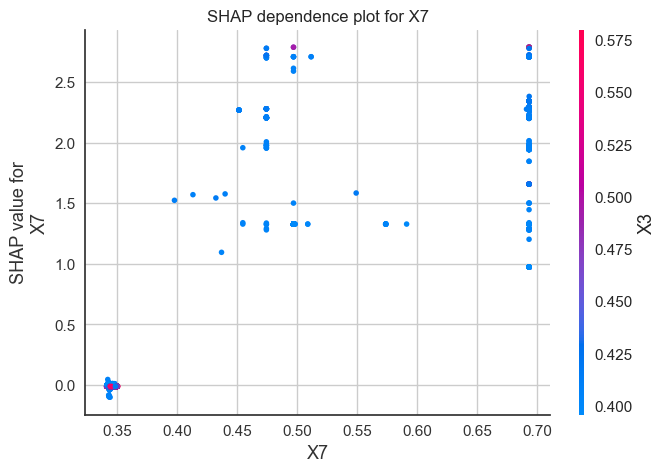

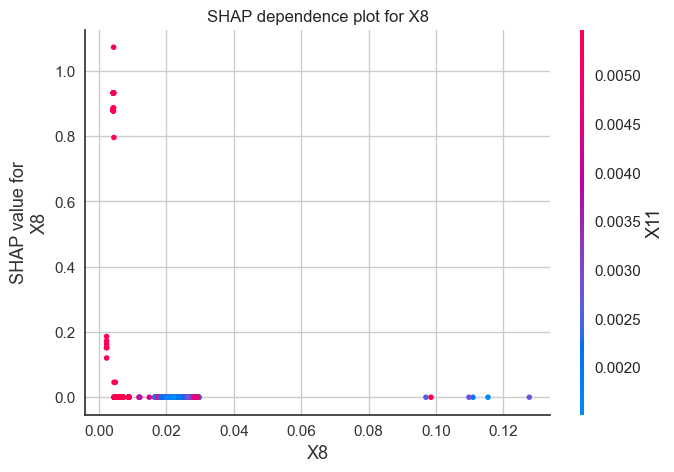

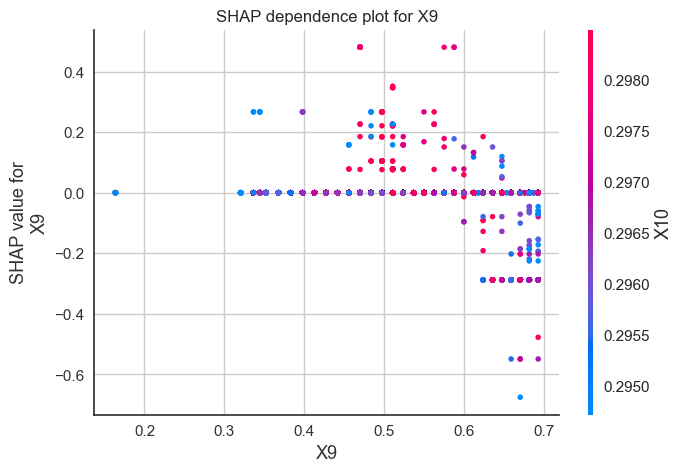

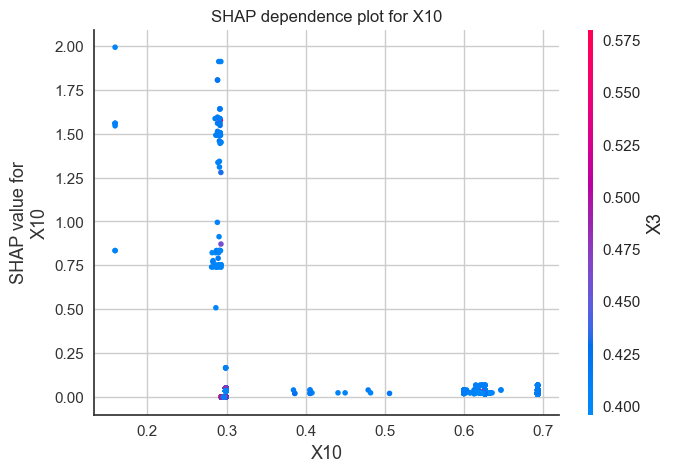

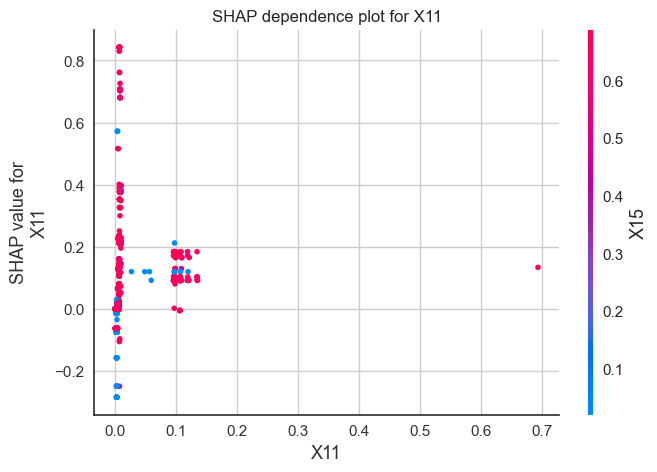

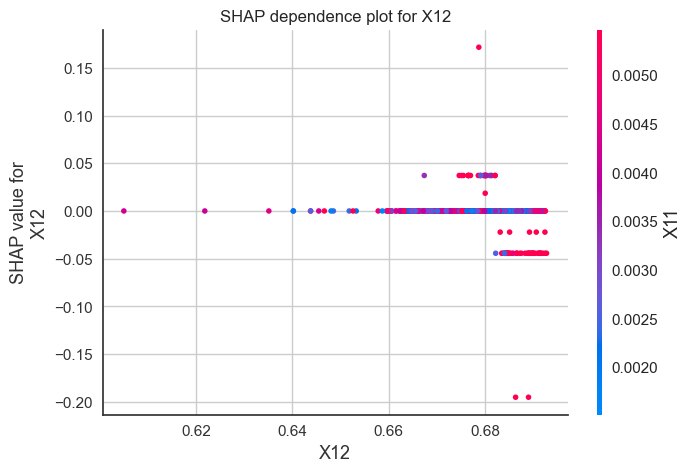

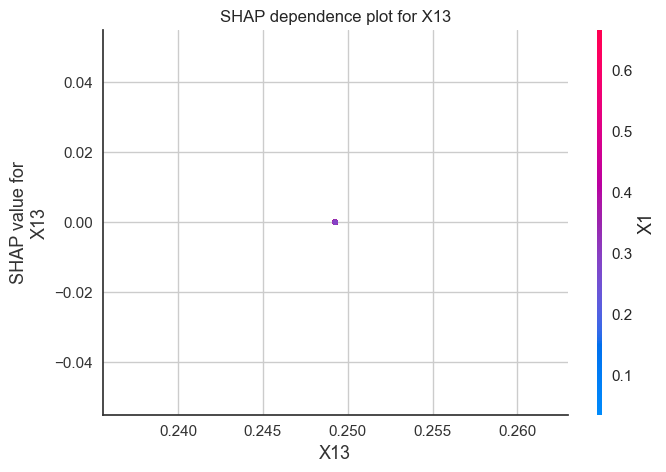

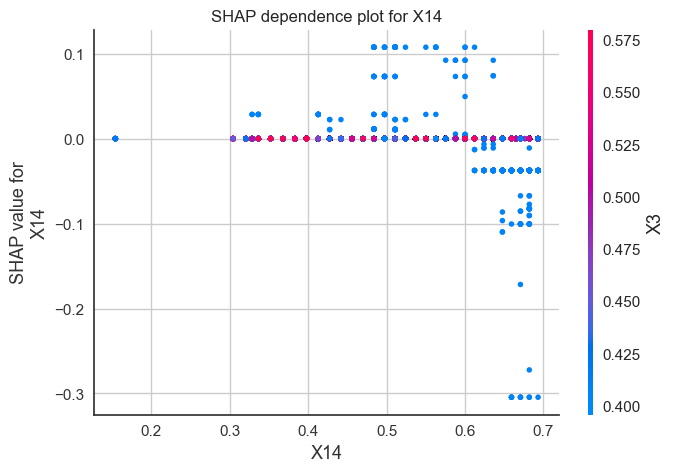

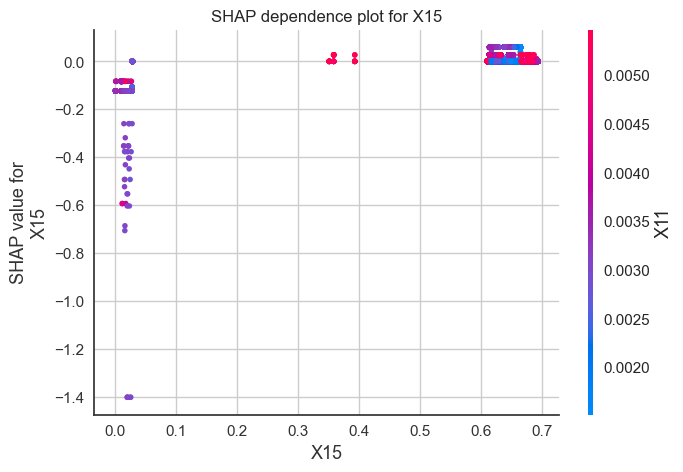

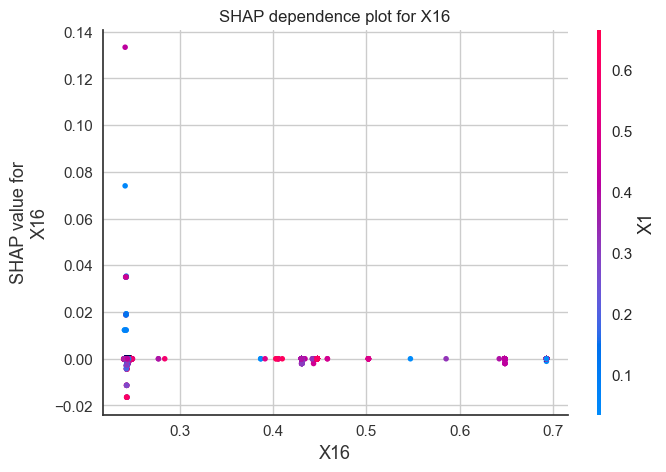

In [19]:
# 요약 플롯
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1])

# 특성 중요도 플롯
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1], plot_type="bar")

# 각 특성의 SHAP 값 분포 플롯
for i in range(X_test.shape[1]):
    shap.dependence_plot(i, shap_values.values, X_test, show=False, feature_names=data.columns[:-1])
    plt.title(f'SHAP dependence plot for {data.columns[i]}')
    plt.show()

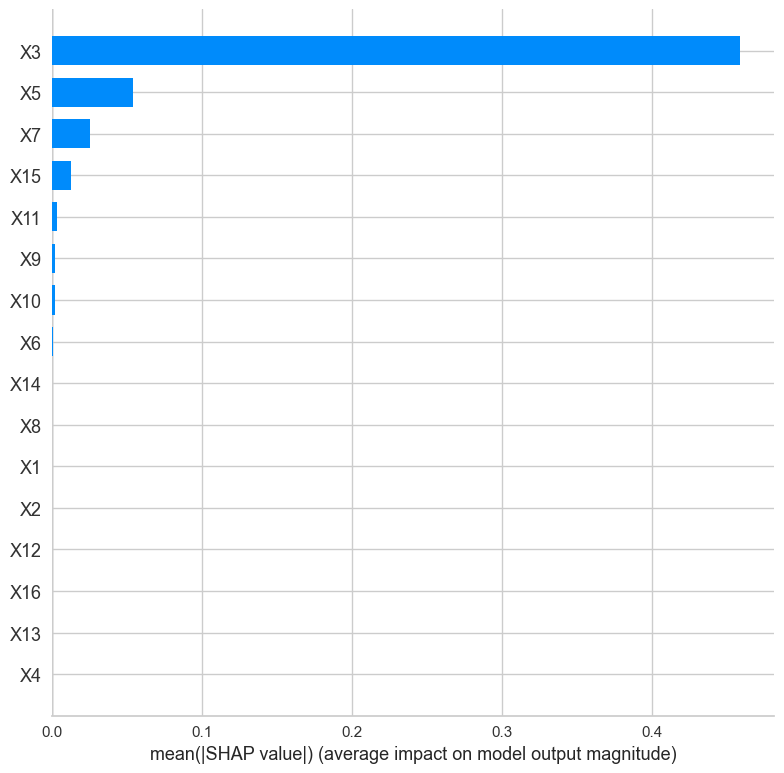

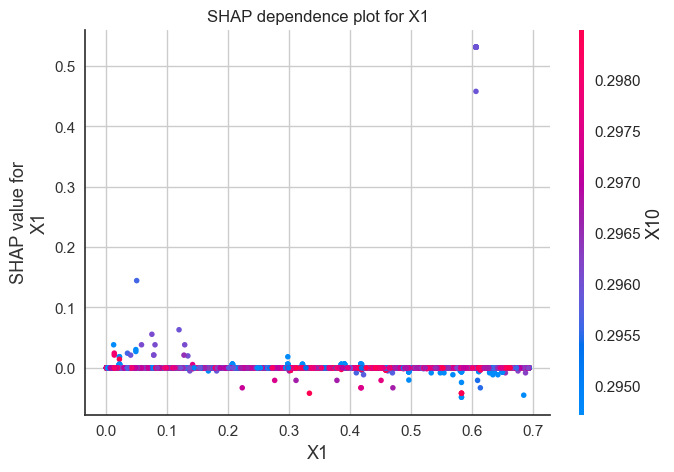

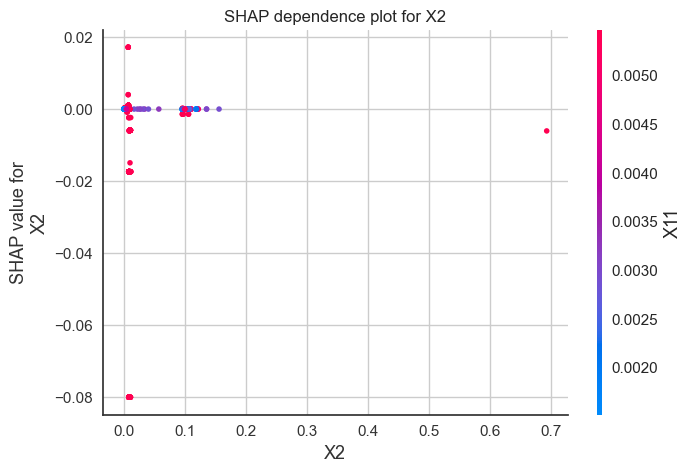

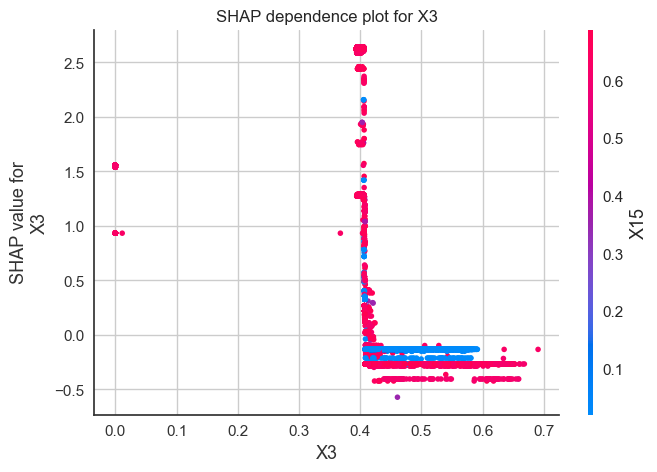

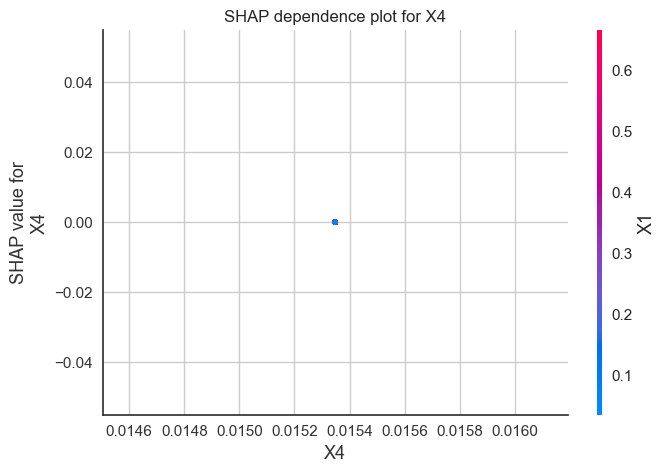

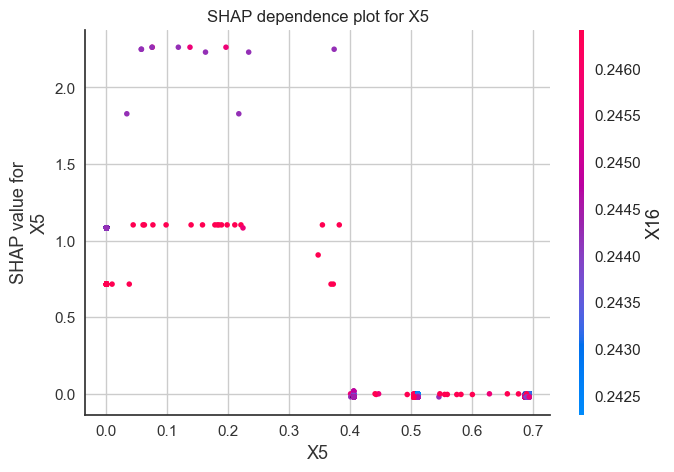

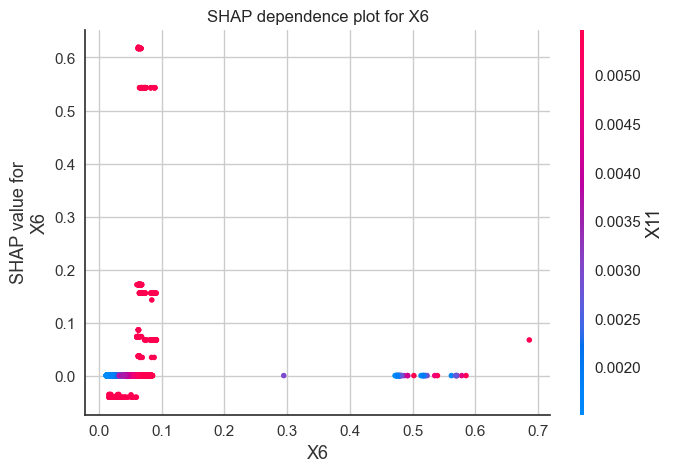

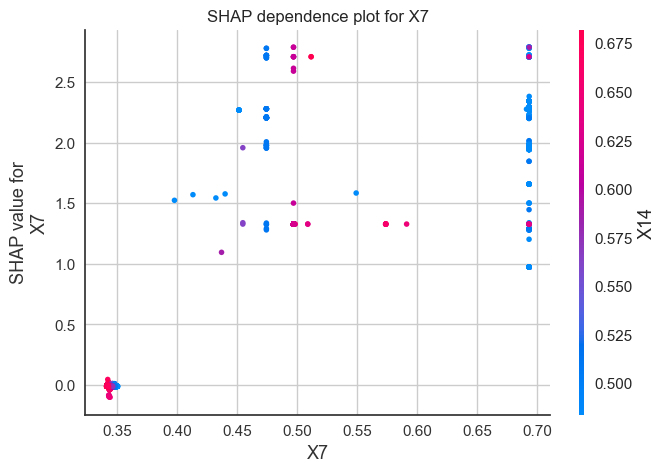

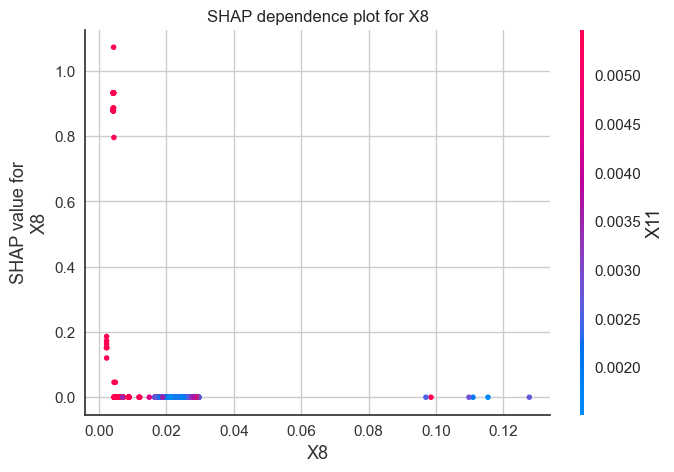

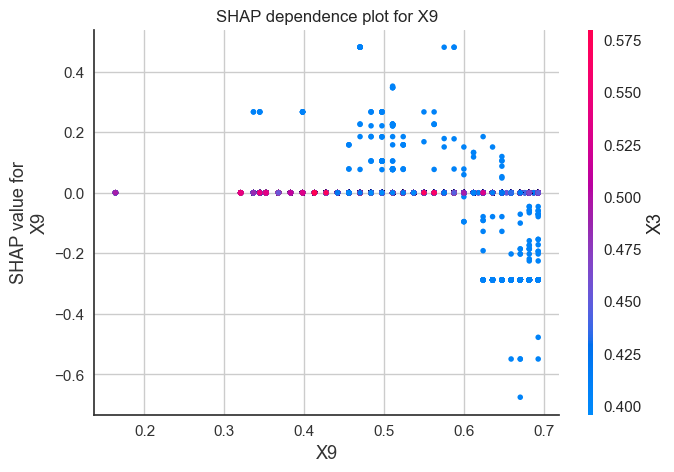

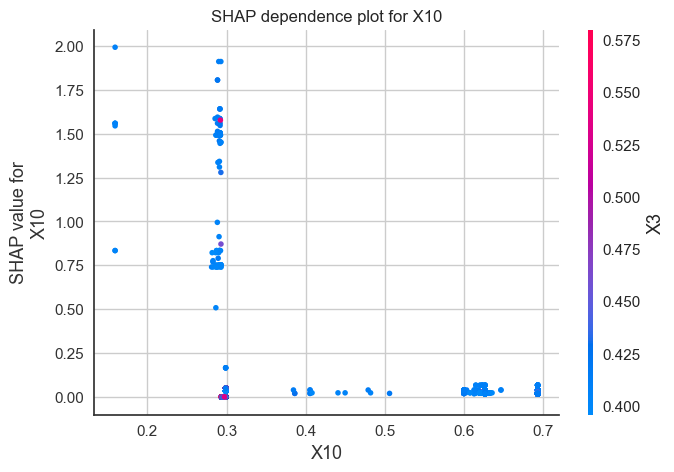

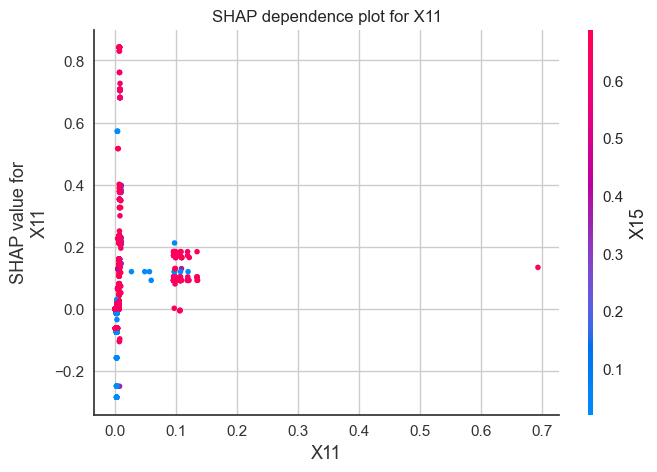

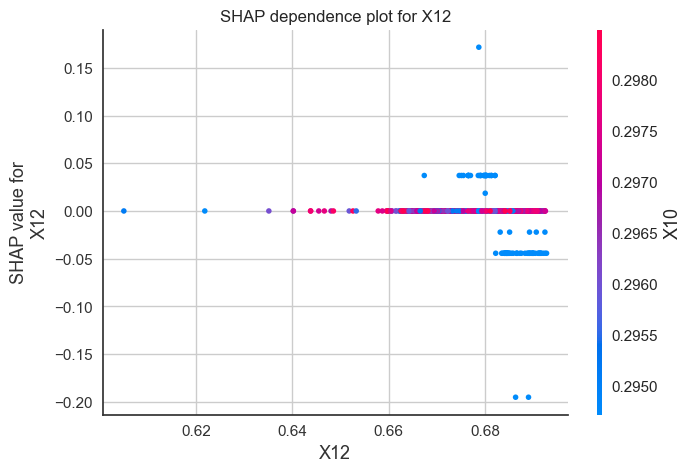

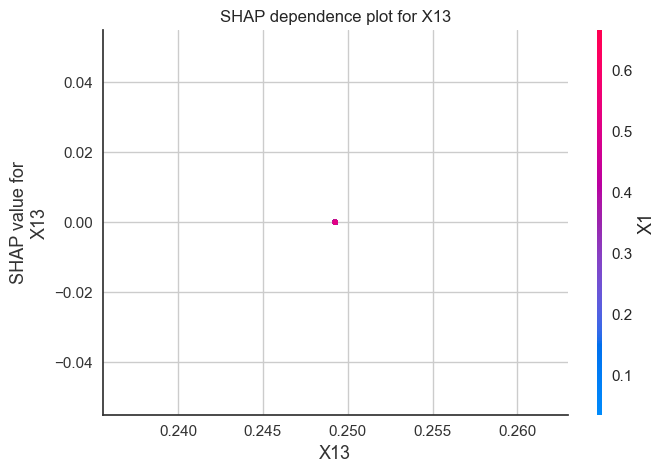

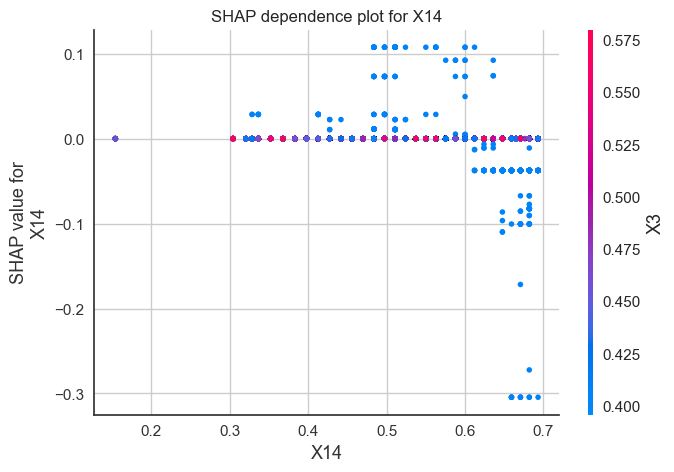

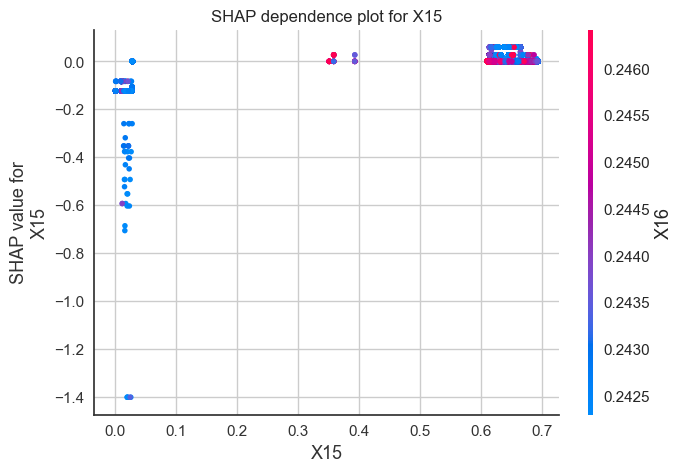

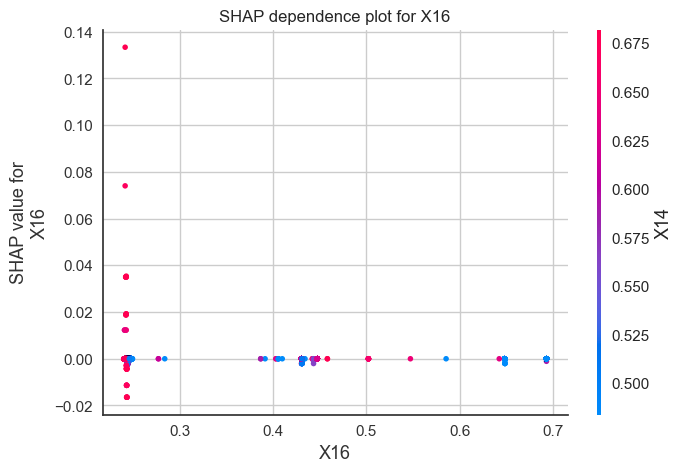

In [20]:
# 특성 중요도 플롯
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1], plot_type="bar")

# 각 특성의 SHAP 값 분포 플롯
for i in range(X_test.shape[1]):
    shap.dependence_plot(i, shap_values.values, X_test, show=False, feature_names=data.columns[:-1])
    plt.title(f'SHAP dependence plot for {data.columns[i]}')
    plt.show()

Text(0.5, 1.0, 'X3 Distribution')

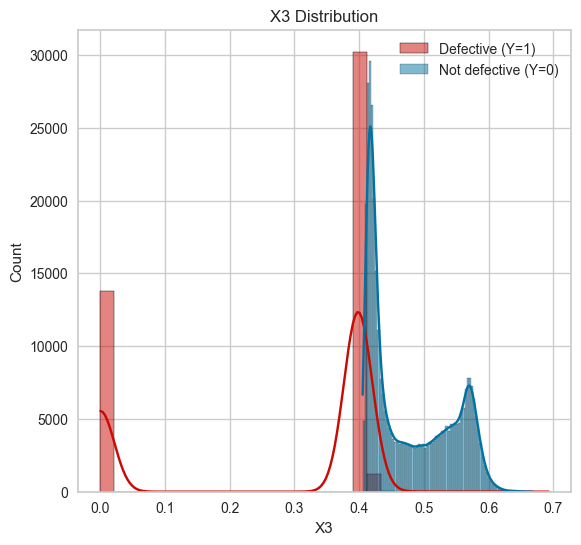

In [21]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(X_train[y_train == 1]['X3'], color='r', label='Defective (Y=1)', kde=True)
sns.histplot(X_train[y_train == 0]['X3'], color='b', label='Not defective (Y=0)', kde=True)
plt.legend()
plt.title('X3 Distribution')

### x3가 Y값에 미치는 영향 파악

In [22]:
from pdpbox import info_plots

# pima_feature = X_train.columns
# pima_target = 'Y'

target_plot = info_plots.TargetPlot(
    df=data,
    feature='X3',
    feature_name='X3',
    target='Y',
)

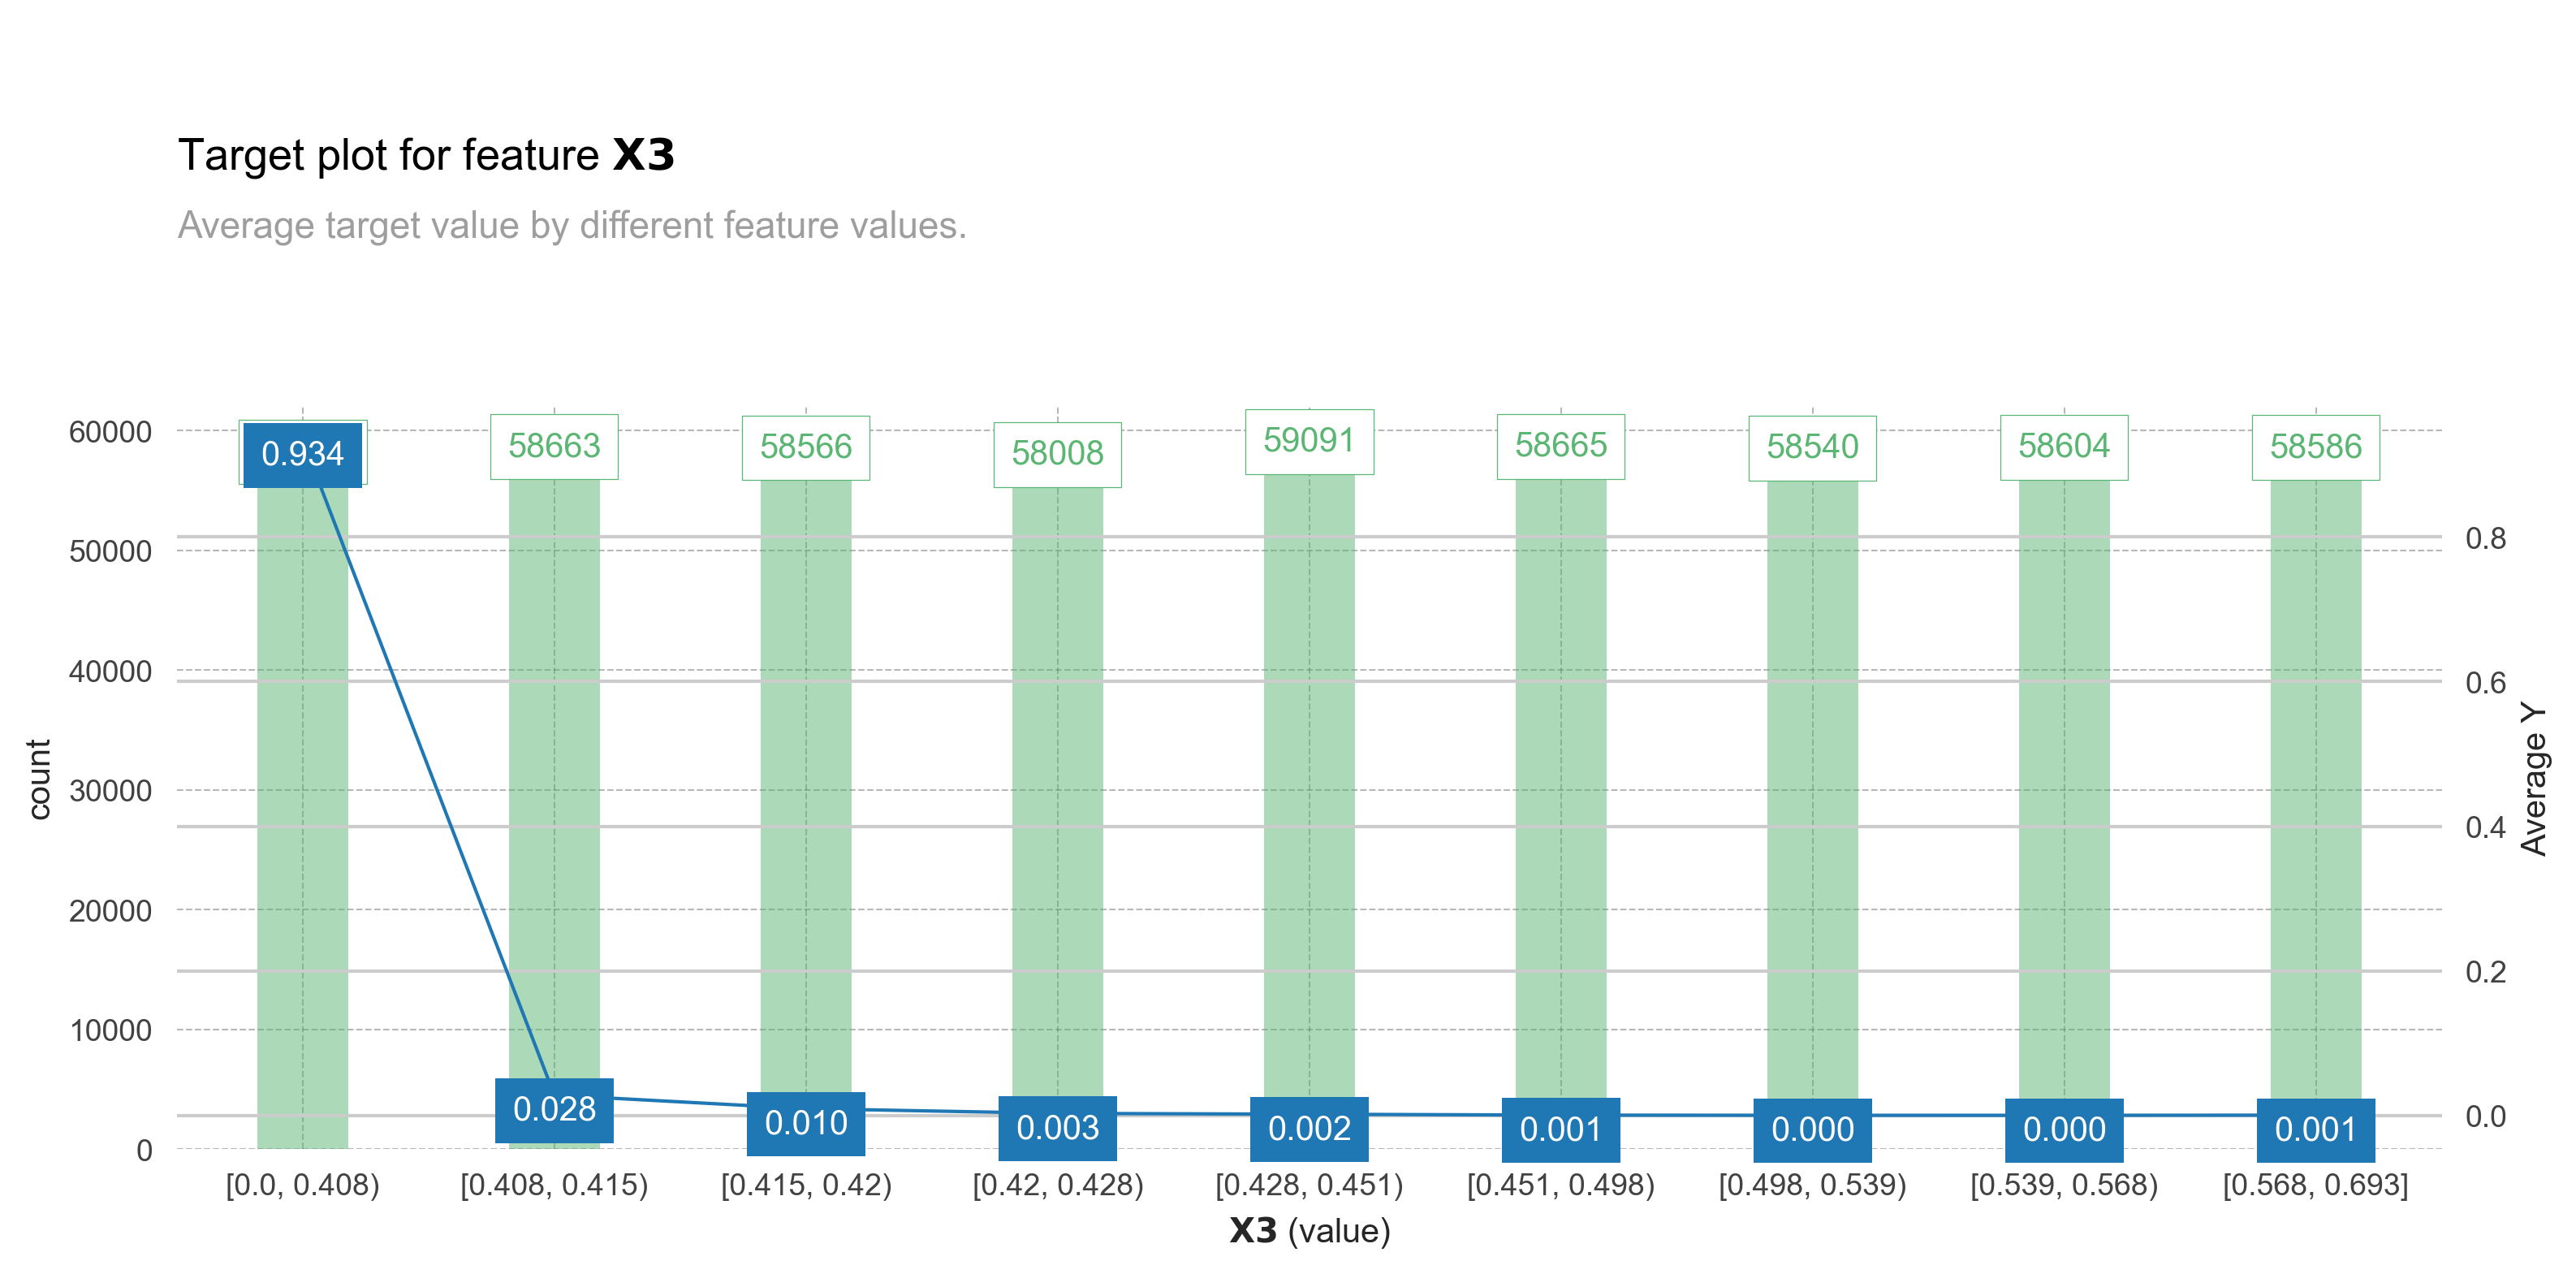

In [23]:
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

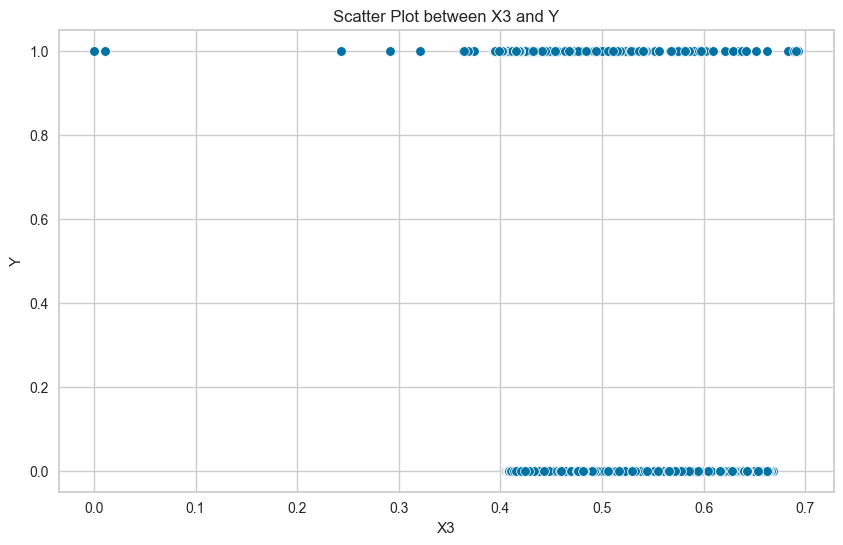

In [24]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X3', y='Y', data=data)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Scatter Plot between X3 and Y')
plt.show()


In [25]:
condition = (data['Y'] == 1)
count_one = data[condition].shape[0]
condition = (data['Y'] == 0)
count_zero = data[condition].shape[0]

(count_zero, count_one)

(469960, 56995)

In [26]:
condition = (data['X3'] < 0.405) & (data['Y'] == 0)
count = data[condition].shape[0]

count

0

In [27]:
condition = (data['X3'] < 0.405) & (data['Y'] == 1)
count = data[condition].shape[0]

count

53263

In [28]:
condition = (data['X3'] >= 0.405) & (data['Y'] == 1)
count = data[condition].shape[0]

count

3732

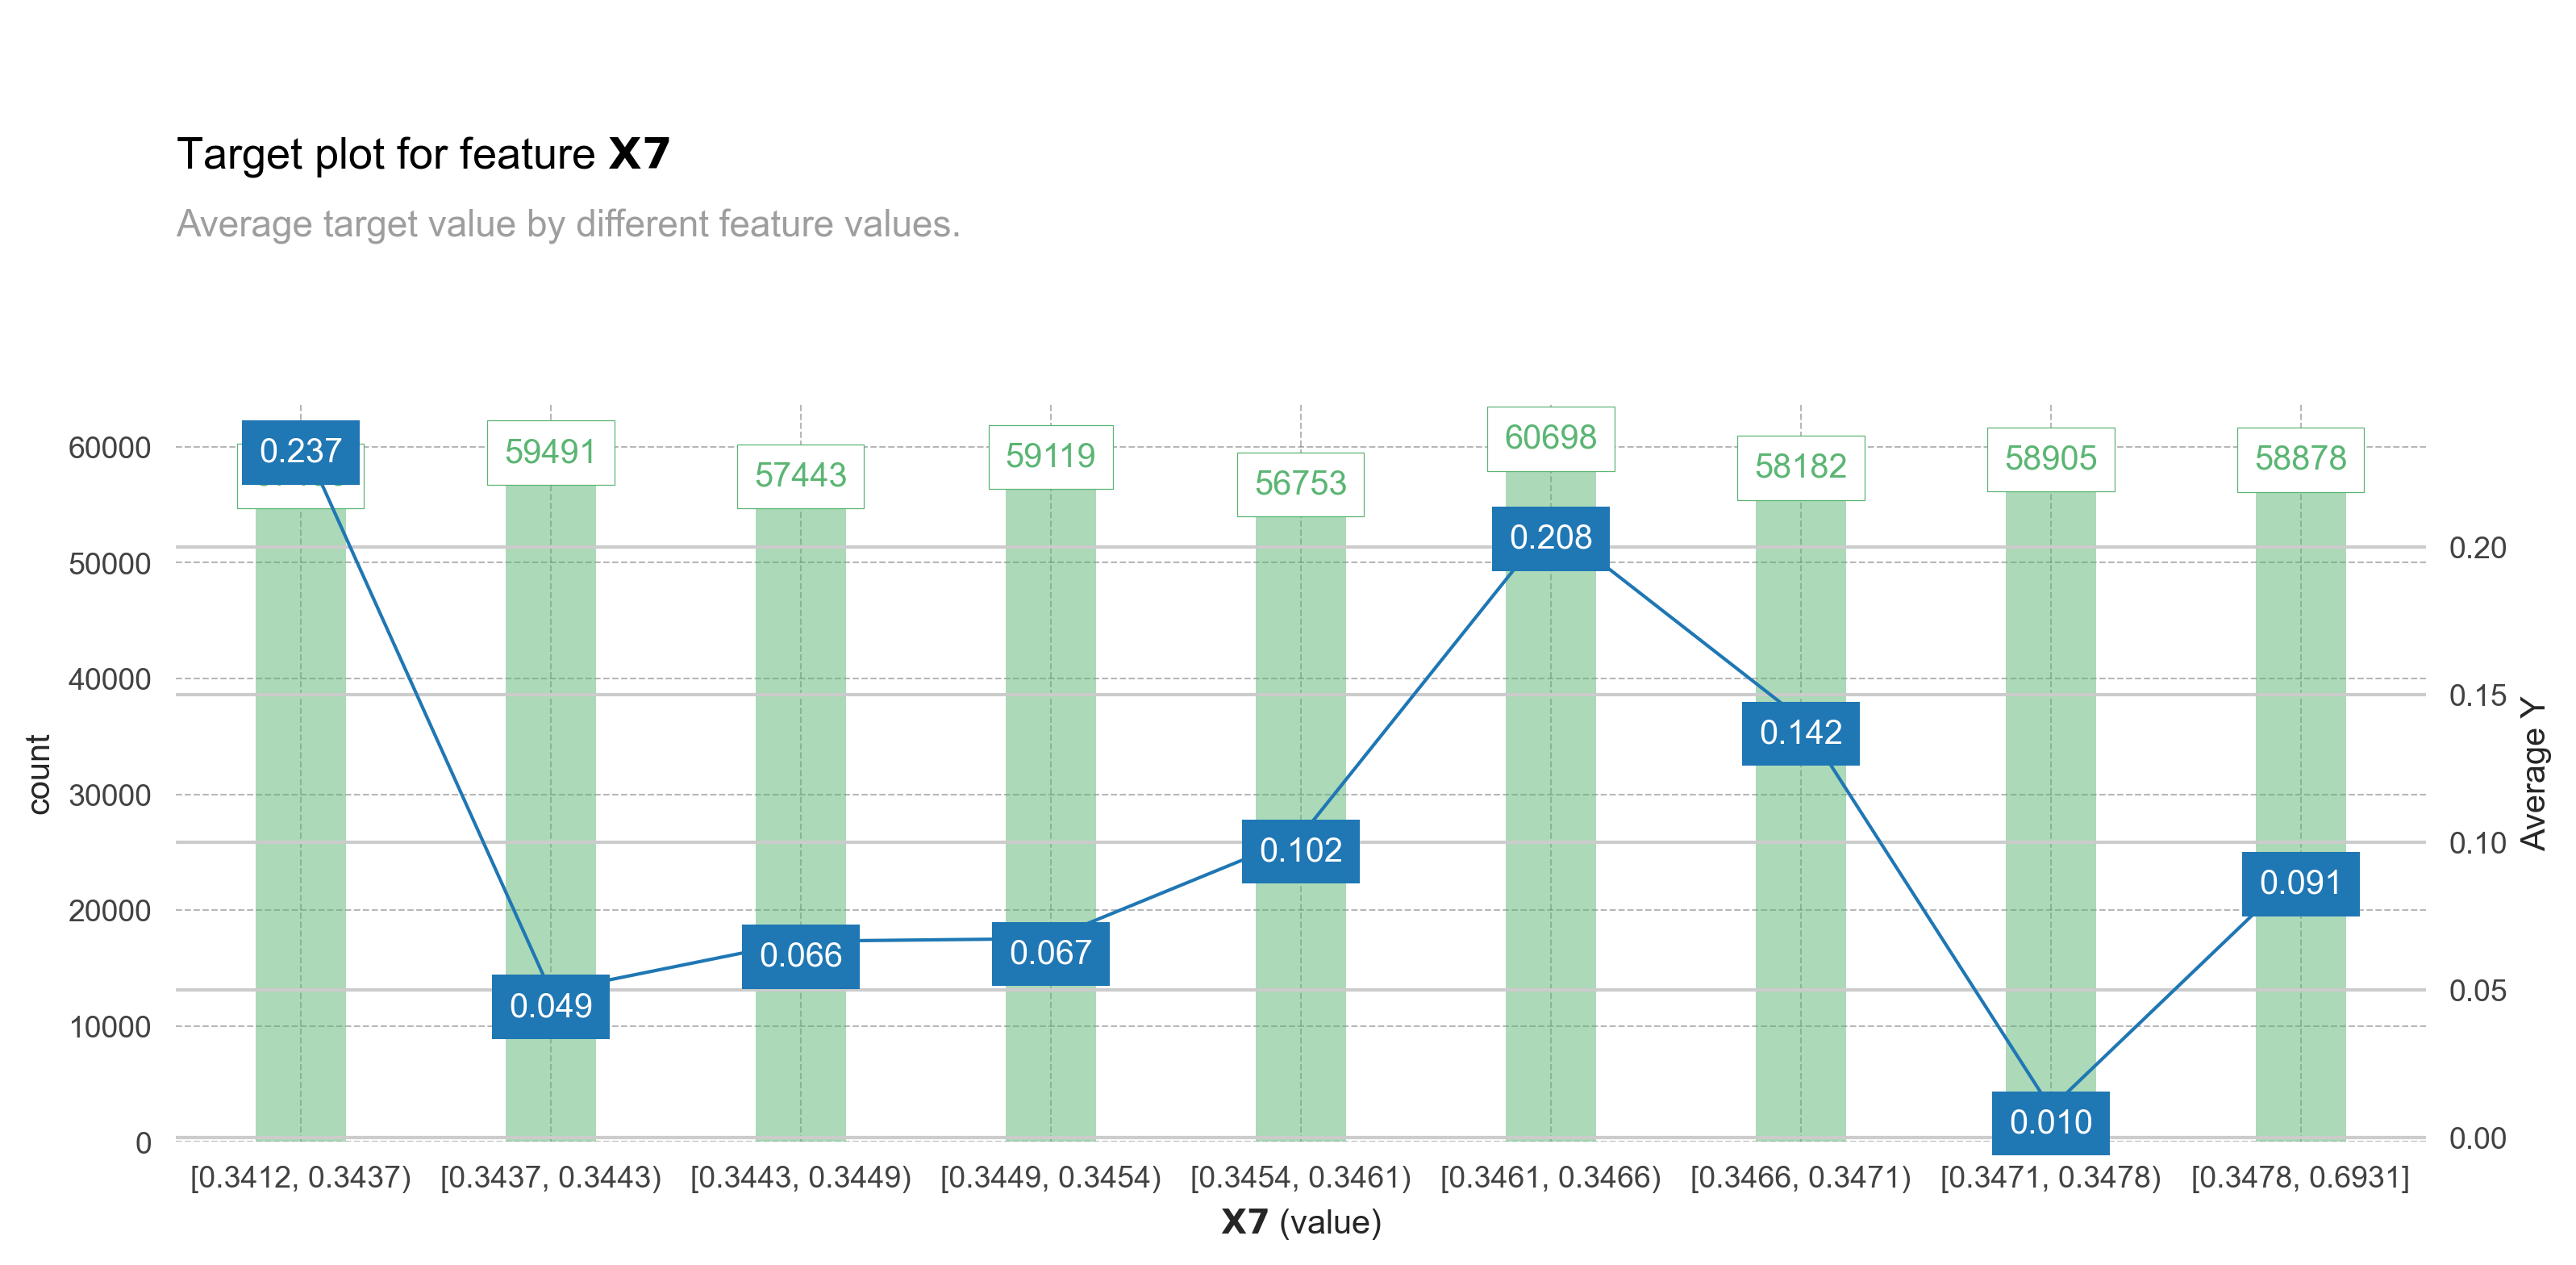

In [38]:
target_plot = info_plots.TargetPlot(
    df=data,
    feature='X7',
    feature_name='X7',
    target='Y',
)
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

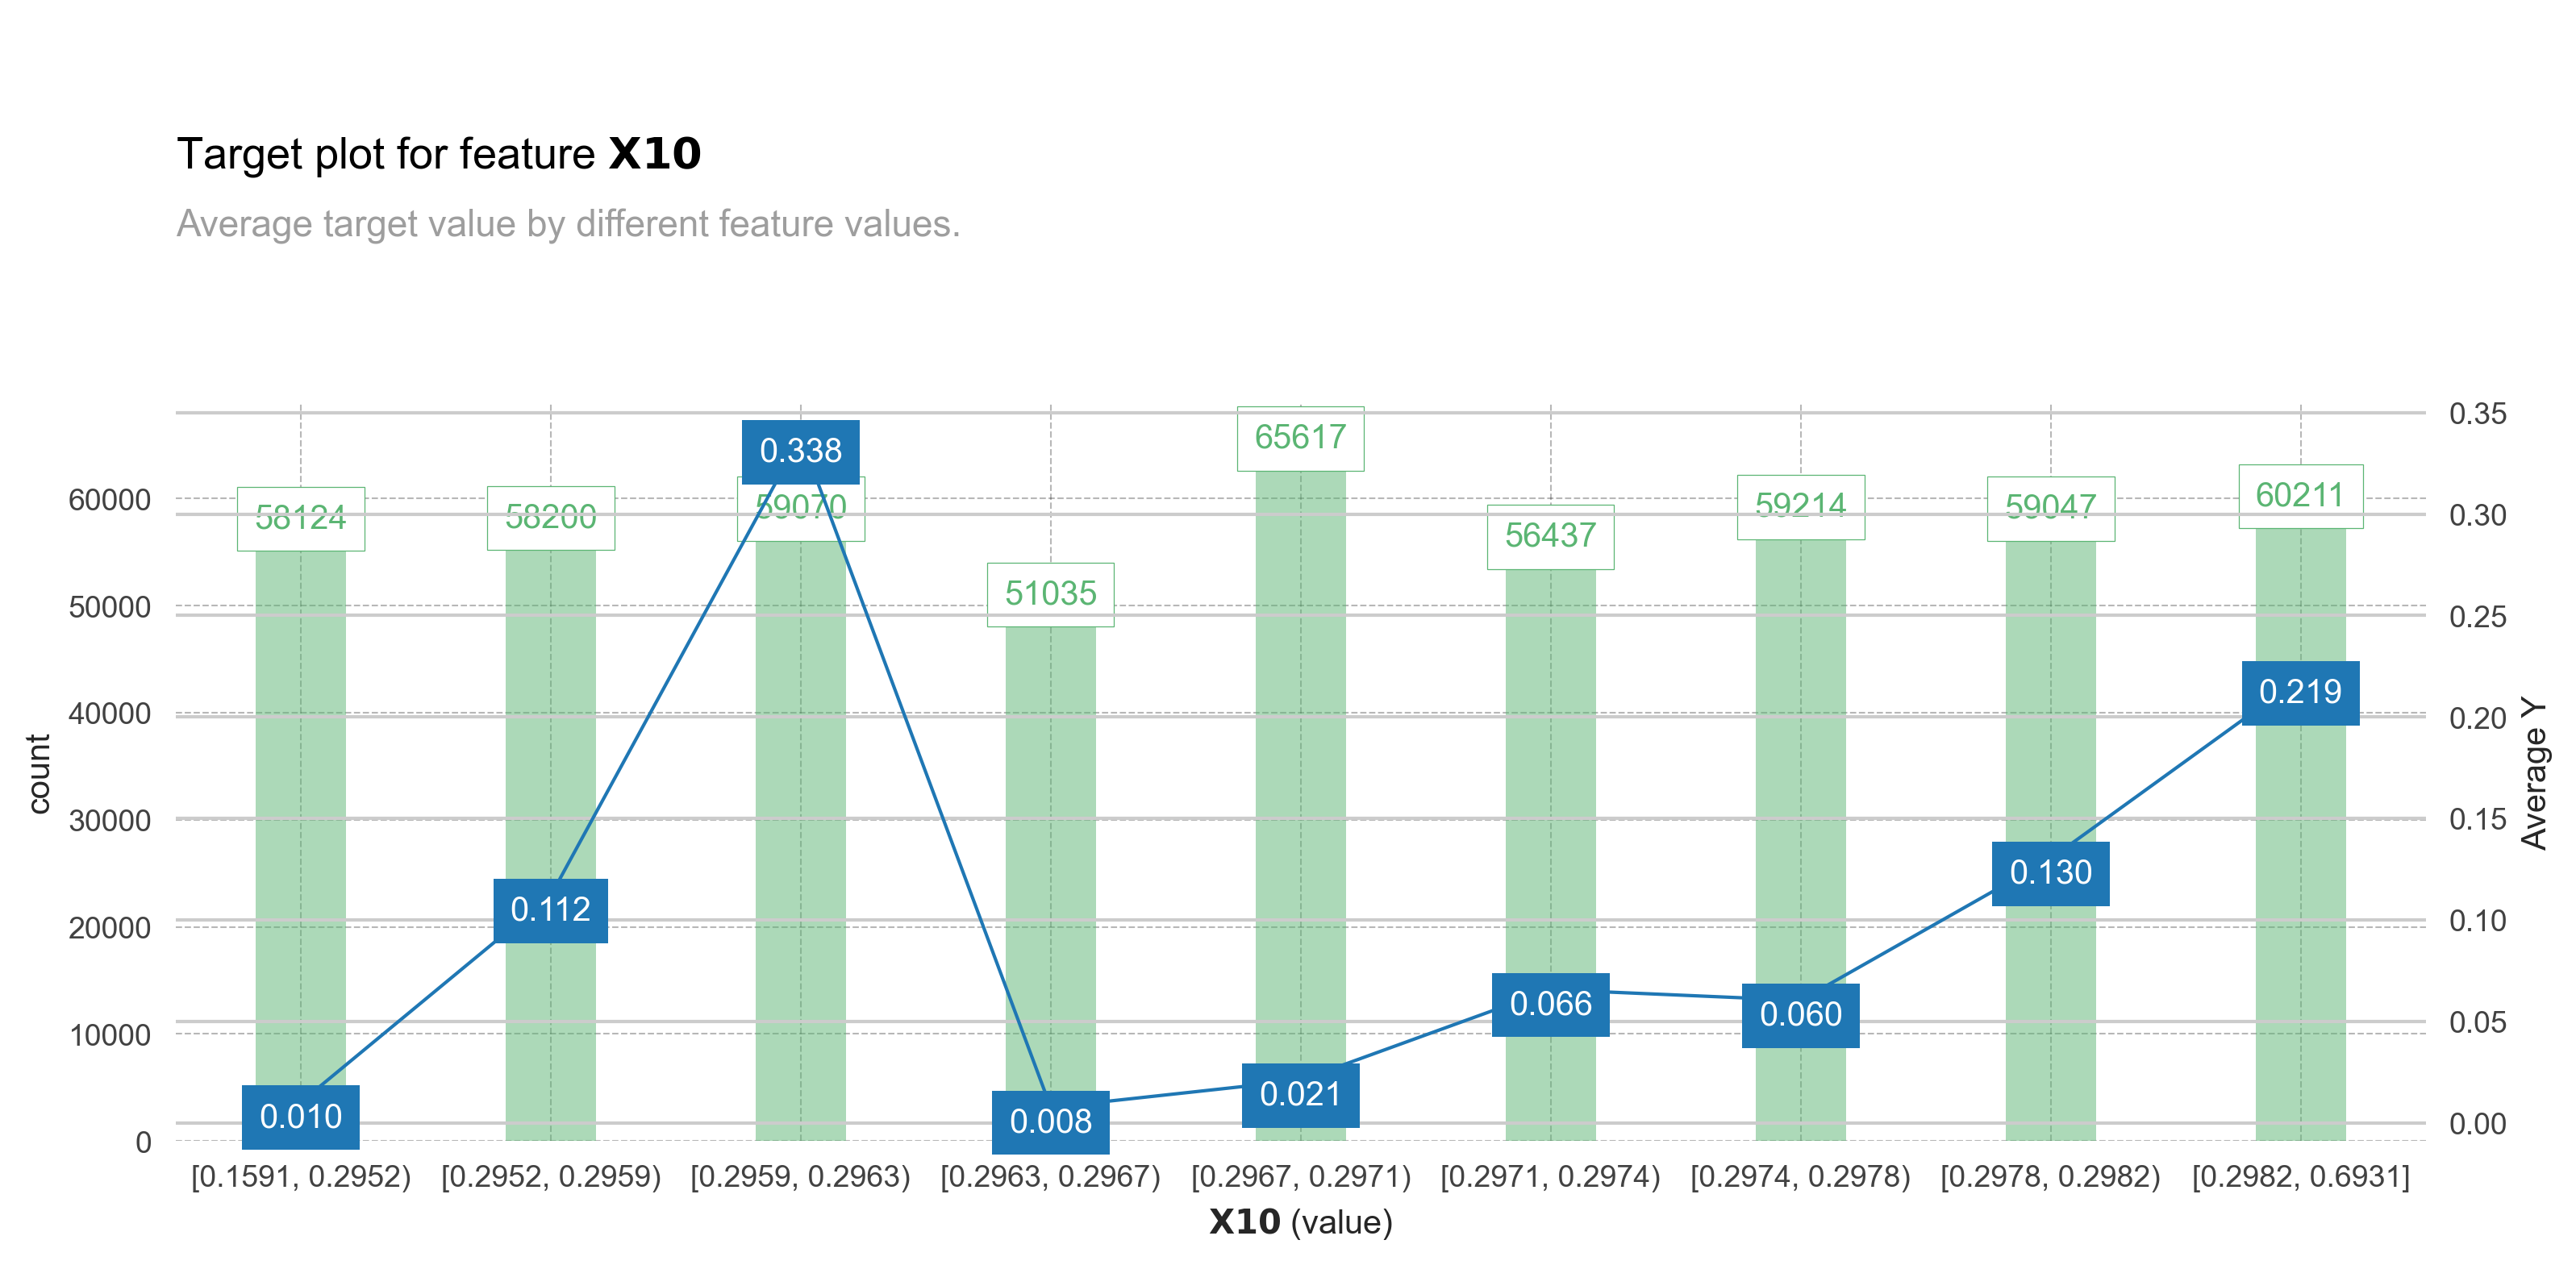

In [37]:
target_plot = info_plots.TargetPlot(
    df=data,
    feature='X10',
    feature_name='X10',
    target='Y',
)
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

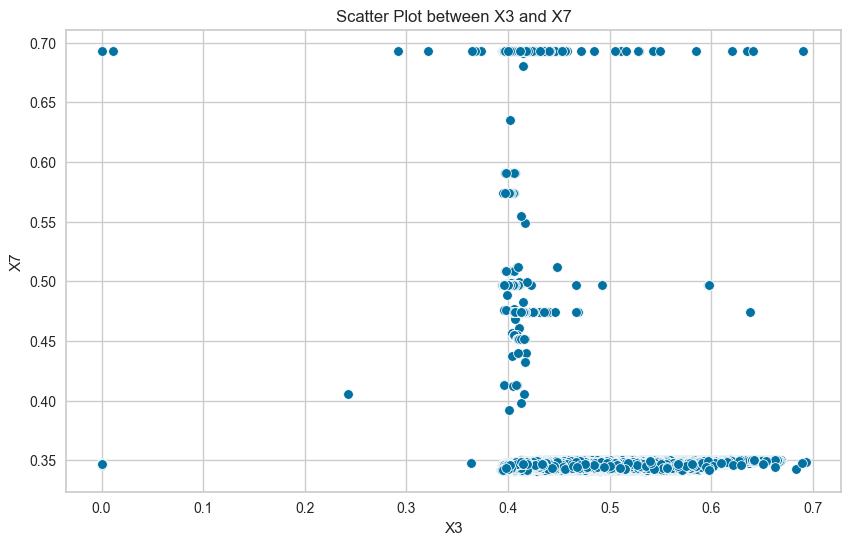

Pearson Correlation Coefficient between X3 and X7:
          X3        X7
X3  1.000000 -0.065302
X7 -0.065302  1.000000


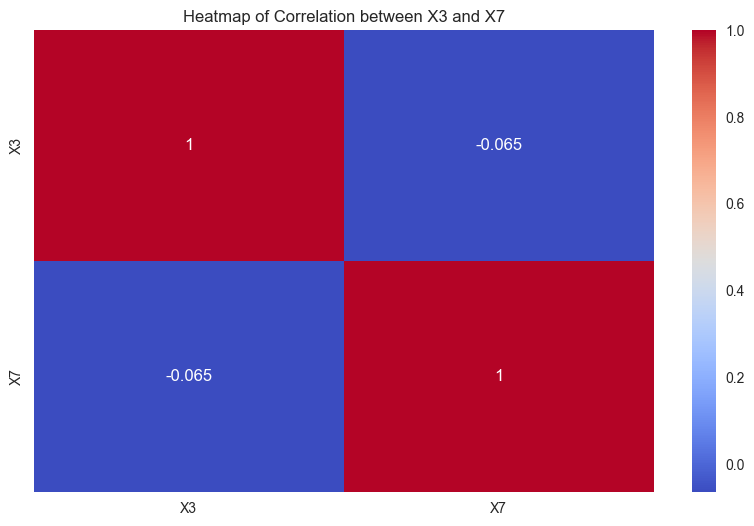

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X3', y='X7', data=data)
plt.xlabel('X3')
plt.ylabel('X7')
plt.title('Scatter Plot between X3 and X7')
plt.show()

# 피어슨 상관 계수 계산
correlation = data[['X3', 'X7']].corr(method='pearson')
print("Pearson Correlation Coefficient between X3 and X7:")
print(correlation)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(data[['X3', 'X7']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between X3 and X7')
plt.show()

In [31]:
import os
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams ## 차트의 크기를 조절하기 위한 라이브러리


os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
rcParams['figure.figsize'] = 200, 100 ## 차트의 크기를 조절

## 트리를 그린다.
plot_tree(xgb)
plt.show() ## 차트를 보여준다.

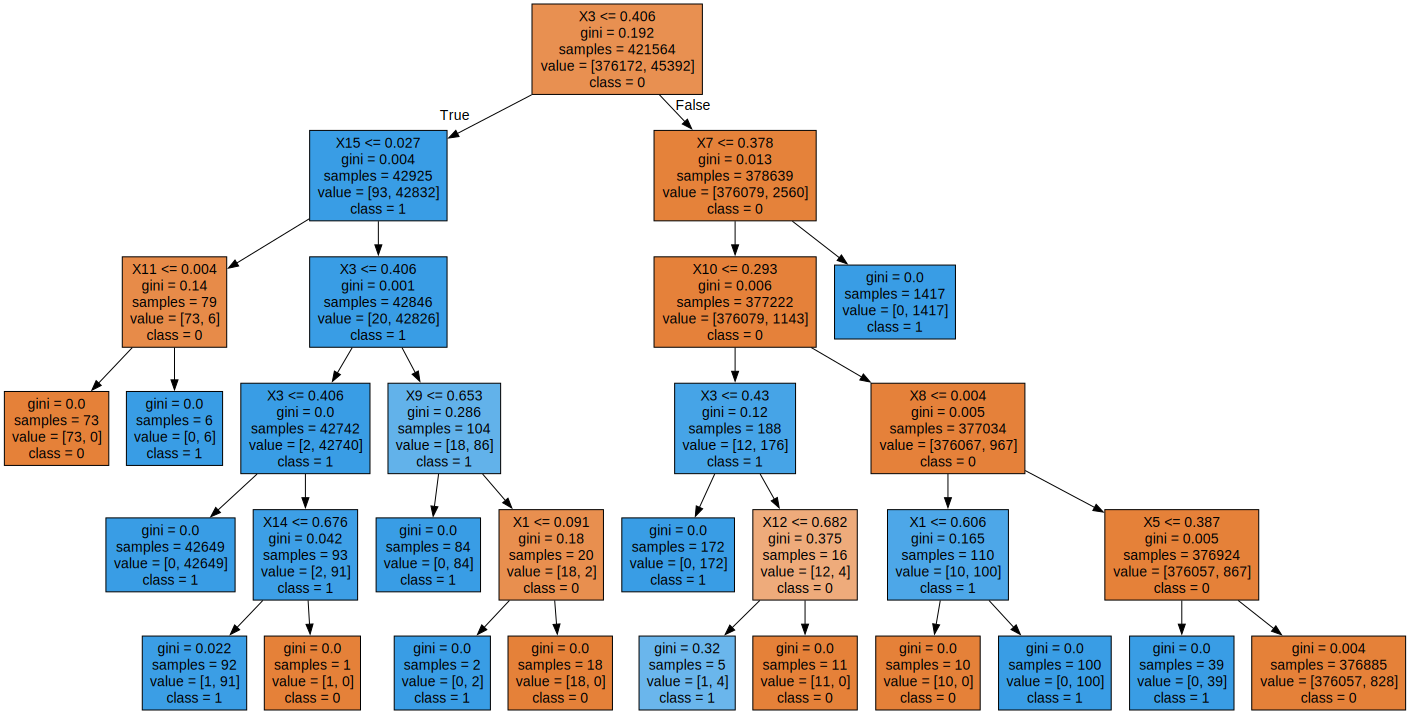

In [32]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42, 
                                max_depth=5,
                                )

dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", 
                class_names=['0','1'],
                feature_names = X_train.columns, 
                impurity=True, 
                filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [33]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
34185,0.654518,0.004330,0.412258,0.015348,0.693147,0.041698,0.343890,0.027929,0.670674,0.294763,0.003656,0.687511,0.249262,0.670674,0.689884,0.243276
178072,0.030328,0.003398,0.533966,0.015348,0.693147,0.035842,0.347777,0.025855,0.575364,0.295982,0.002928,0.683176,0.249262,0.562785,0.632312,0.246280
159750,0.676623,0.003292,0.423246,0.015348,0.693090,0.034267,0.346269,0.024797,0.562785,0.297013,0.002700,0.686104,0.249262,0.575364,0.643912,0.244616
50632,0.586322,0.005767,0.565887,0.015348,0.693147,0.053185,0.345973,0.028202,0.587787,0.297368,0.004557,0.674534,0.249262,0.587787,0.679156,0.244425
416822,0.640801,0.003742,0.436793,0.015348,0.693147,0.036961,0.343879,0.027882,0.670674,0.297188,0.003086,0.670879,0.249262,0.670674,0.013128,0.243186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.110735,0.005338,0.423000,0.015348,0.405465,0.050172,0.346065,0.028102,0.635989,0.295403,0.004215,0.682961,0.249262,0.624154,0.675700,0.245254
259178,0.446832,0.002793,0.416238,0.015348,0.693090,0.029082,0.345419,0.024416,0.624154,0.298007,0.002440,0.686650,0.249262,0.624154,0.647041,0.244053
365838,0.400026,0.008040,0.543773,0.015348,0.693147,0.069878,0.348205,0.028933,0.483797,0.296249,0.005923,0.680046,0.249262,0.470004,0.682671,0.246715
131932,0.676891,0.003305,0.475898,0.015348,0.693147,0.033723,0.342860,0.027964,0.693147,0.294472,0.002853,0.681844,0.249262,0.681974,0.023630,0.242193


### 결론

In [34]:
y1_count = data[data['Y'] == 1].shape[0]
y1_count/len(data)

0.1081591407235912

In [40]:
1143/len(data)

0.0021690656697440957